# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = json.load(open('data.json'))

In [3]:
solutions = pd.read_csv('Solutions.csv')

# Polynomial Sequences

In [4]:
from sequences.polynomial_sequences import *

## 10th - 1st (AP) Order Sequences

Solving 10 order


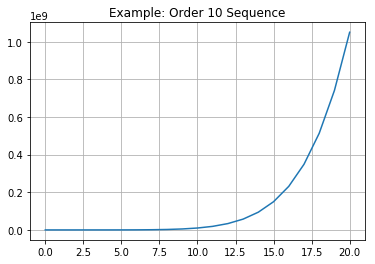


Solved order 10: 4662 (2.11%)
Solving 9 order


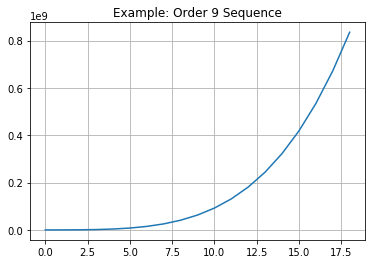


Solved order 9: 4765 (2.16%)
Solving 8 order


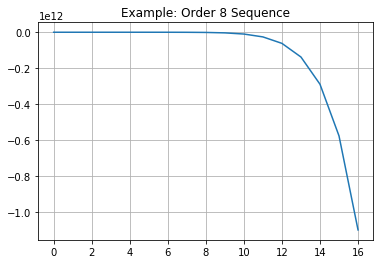


Solved order 8: 4763 (2.16%)
Solving 7 order


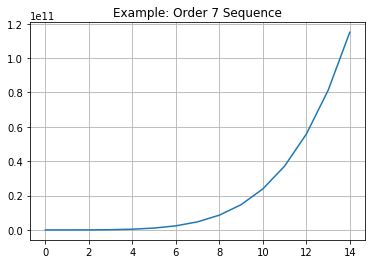


Solved order 7: 4656 (2.11%)
Solving 6 order


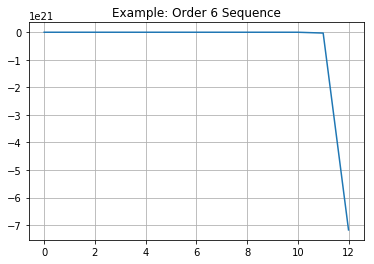


Solved order 6: 4578 (2.08%)
Solving 5 order


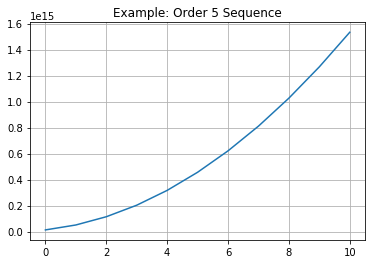


Solved order 5: 4151 (1.88%)
Solving 4 order


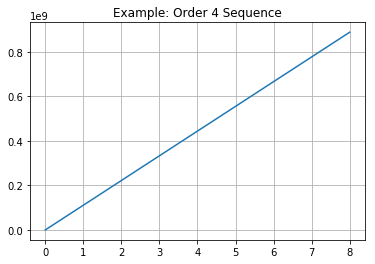


Solved order 4: 3788 (1.72%)
Solving 3 order


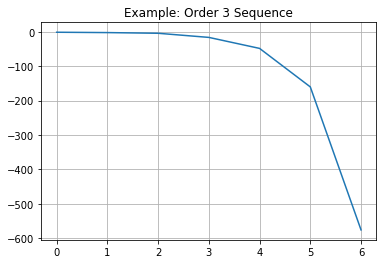


Solved order 3: 3187 (1.44%)
Solving 2 order


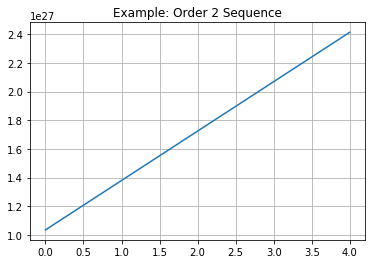


Solved order 2: 2457 (1.11%)
Solving 1 order


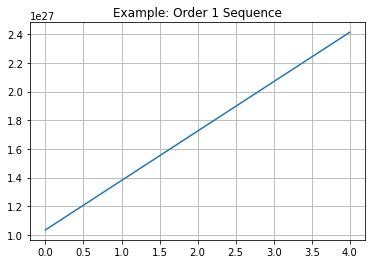


Solved order 1: 1201 (0.54%)


In [5]:
for order in range(10, 0, -1):
    print(f'Solving {order} order')
    count = 0
    solutions[f'p{order}'] = 0
    for i in trange(len(data)):
        seq = data[i]
        coeff = checkPolynomial(seq,order)
        if coeff:
            count += 1
            solutions.loc[i, 'Solved'] = 1
            solutions.loc[i, f'p{order}'] = 1
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                ax.grid()
                ax.set_title(f'Example: Order {order} Sequence')
                plt.show()

    print(f'Solved order {order}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [6]:
solutions.drop(['Id'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved     29.1%
r10        8.04%
r9         9.51%
r8        10.47%
r7        10.24%
r6         9.24%
r5         8.27%
r4         7.76%
r3         6.78%
r2         4.19%
r1         0.75%
p10        2.11%
p9         2.16%
p8         2.16%
p7         2.11%
p6         2.08%
p5         1.88%
p4         1.72%
p3         1.44%
p2         1.11%
p1         0.54%
dtype: object

In [7]:
print('linear recurrence relations', round(solutions[[f'r{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('polynomial sequences', round(solutions[[f'p{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')

linear recurrence relations 29.04 %
polynomial sequences 2.59 %


In [8]:
solutions.to_csv('Solutions.csv', index=False)